# 附件一预处理（不包括异常值剔除及标准化）

In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_excel("Data\\First\\New\\201404070532.xlsx",sheet_name='201404070532')
data

,月,日,具体时间,海拔高度,下降率,无线电高度,计算空速,地速,起落架,空地电门0.2秒,...,下滑道偏差（L）,下滑道偏差（R）,航向道偏差（C）,航向道偏差（L）,航向道偏差（R）,俯仰角率,起飞机场,落地机场,俯仰角率.1,飞机重量
0,4,7,5:32:48,135,-5,-8,30.0,8.00,DOWN,False,...,-0.58,-0.29,-3.17,-3.04,-3.28,0.0625,机场68,机场117,0.0625,347680
1,4,7,5:32:49,136,-9,-8,30.0,8.25,DOWN,False,...,-0.62,-0.36,-2.78,-2.78,-2.95,-0.0625,机场68,机场117,-0.0625,347680
2,4,7,5:32:50,136,-12,-8,30.0,8.25,DOWN,False,...,0.26,-0.10,-3.06,-2.96,-3.18,-0.0625,机场68,机场117,-0.0625,347680
3,4,7,5:32:51,135,-4,-8,30.0,8.25,DOWN,False,...,-0.21,0.13,-2.78,-2.78,-2.92,-0.0625,机场68,机场117,-0.0625,347680
4,4,7,5:32:52,136,-3,-8,30.0,8.50,DOWN,False,...,0.00,-0.48,-2.94,-2.88,-3.09,0.0000,机场68,机场117,0.0000,347680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38667,4,7,16:17:27,469,12,-8,30.0,1.50,DOWN,False,...,-5.13,-2.12,3.25,3.40,3.30,-0.1250,机场68,机场117,-0.1250,256480
38668,4,7,16:17:28,469,13,-8,30.0,1.50,DOWN,False,...,-5.29,-2.10,3.24,3.41,3.27,-0.0625,机场68,机场117,-0.0625,256480
38669,4,7,16:17:29,469,12,-8,30.0,1.50,DOWN,False,...,-4.98,-1.85,3.32,3.46,3.33,-0.0625,机场68,机场117,-0.0625,256480
38670,4,7,16:17:30,470,1,-8,30.0,1.50,DOWN,False,...,-4.31,-1.41,3.25,3.38,3.30,0.0000,机场68,机场117,0.0000,256480


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38672 entries, 0 to 38671
Data columns (total 64 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   月              38672 non-null  int64  
 1   日              38672 non-null  int64  
 2   具体时间           38672 non-null  object 
 3   海拔高度           38672 non-null  int64  
 4   下降率            38672 non-null  int64  
 5   无线电高度          38672 non-null  int64  
 6   计算空速           38672 non-null  float64
 7   地速             38672 non-null  float64
 8   起落架            1565 non-null   object 
 9   空地电门0.2秒       38672 non-null  bool   
 10  空地电门0.4秒       38672 non-null  bool   
 11  空地电门0.6秒       38672 non-null  bool   
 12  空地电门0.8秒       38672 non-null  bool   
 13  空地电门1秒         38672 non-null  bool   
 14  着陆G值0.1秒       38672 non-null  float64
 15  着陆G值0.2秒       38672 non-null  float64
 16  着陆G值0.3秒       38672 non-null  float64
 17  着陆G值0.4秒       38672 non-null  float64
 18  着陆G值0.

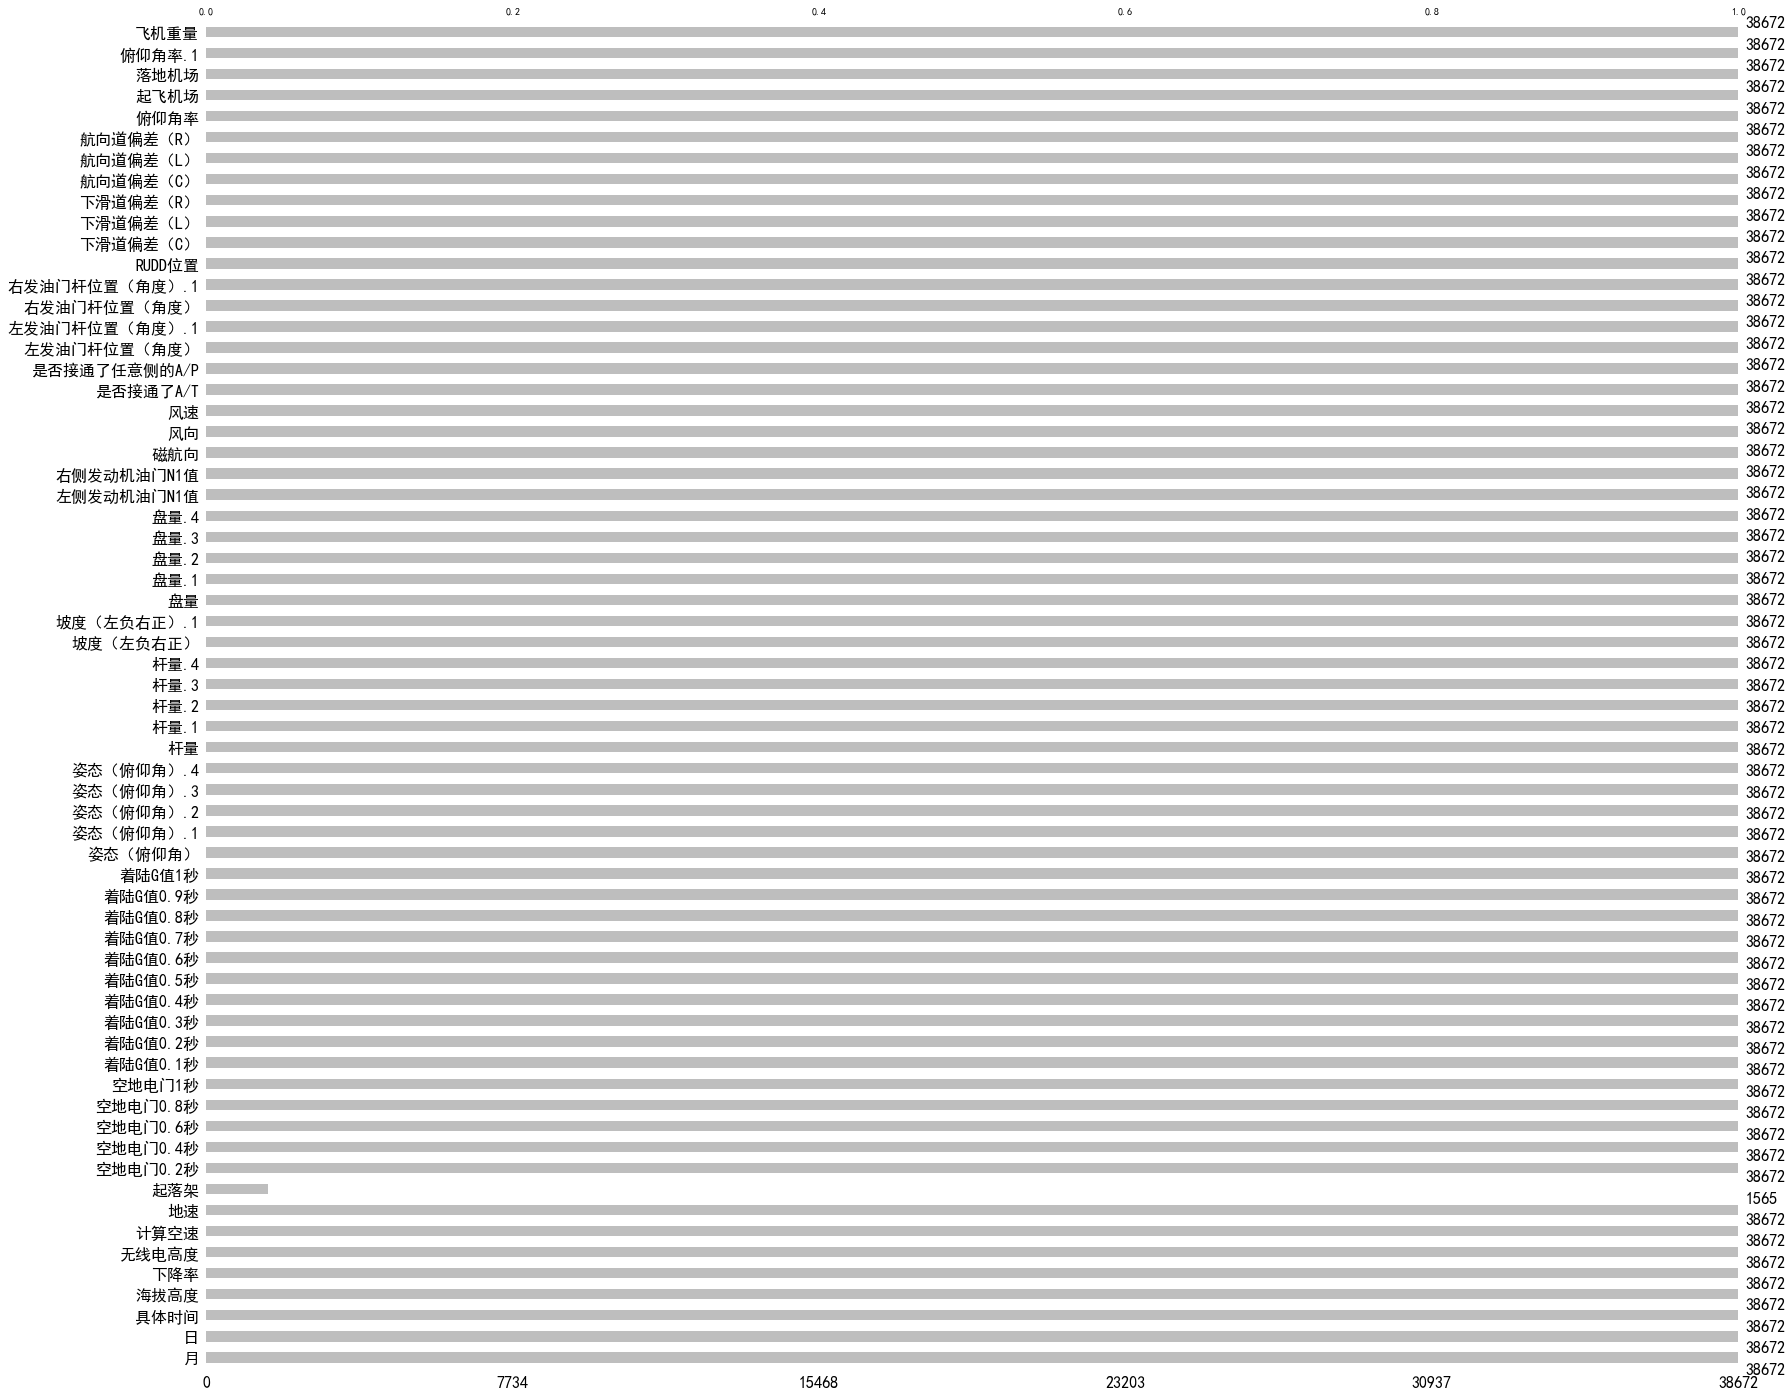

In [4]:
import missingno
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
missingno.bar(data, color=(190/255,190/255,190/255))
plt.tight_layout()

In [5]:
data.replace({"起落架":{'DOWN':1},
              "空地电门0.2秒":{True:1,False:0},
              "空地电门0.4秒":{True:1,False:0},
              "空地电门0.6秒":{True:1,False:0},
              "空地电门0.8秒":{True:1,False:0},
              "空地电门1秒":{True:1,False:0},
              "是否接通了A/T":{'DISENGD':0,'ENGAGED':1},
              "是否接通了任意侧的A/P":{'OFF':0,'ON':1},
              }, inplace=True)
data

,月,日,具体时间,海拔高度,下降率,无线电高度,计算空速,地速,起落架,空地电门0.2秒,...,下滑道偏差（L）,下滑道偏差（R）,航向道偏差（C）,航向道偏差（L）,航向道偏差（R）,俯仰角率,起飞机场,落地机场,俯仰角率.1,飞机重量
0,4,7,5:32:48,135,-5,-8,30.0,8.00,1.0,0,...,-0.58,-0.29,-3.17,-3.04,-3.28,0.0625,机场68,机场117,0.0625,347680
1,4,7,5:32:49,136,-9,-8,30.0,8.25,1.0,0,...,-0.62,-0.36,-2.78,-2.78,-2.95,-0.0625,机场68,机场117,-0.0625,347680
2,4,7,5:32:50,136,-12,-8,30.0,8.25,1.0,0,...,0.26,-0.10,-3.06,-2.96,-3.18,-0.0625,机场68,机场117,-0.0625,347680
3,4,7,5:32:51,135,-4,-8,30.0,8.25,1.0,0,...,-0.21,0.13,-2.78,-2.78,-2.92,-0.0625,机场68,机场117,-0.0625,347680
4,4,7,5:32:52,136,-3,-8,30.0,8.50,1.0,0,...,0.00,-0.48,-2.94,-2.88,-3.09,0.0000,机场68,机场117,0.0000,347680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38667,4,7,16:17:27,469,12,-8,30.0,1.50,1.0,0,...,-5.13,-2.12,3.25,3.40,3.30,-0.1250,机场68,机场117,-0.1250,256480
38668,4,7,16:17:28,469,13,-8,30.0,1.50,1.0,0,...,-5.29,-2.10,3.24,3.41,3.27,-0.0625,机场68,机场117,-0.0625,256480
38669,4,7,16:17:29,469,12,-8,30.0,1.50,1.0,0,...,-4.98,-1.85,3.32,3.46,3.33,-0.0625,机场68,机场117,-0.0625,256480
38670,4,7,16:17:30,470,1,-8,30.0,1.50,1.0,0,...,-4.31,-1.41,3.25,3.38,3.30,0.0000,机场68,机场117,0.0000,256480


In [6]:
data=data.fillna(0)
data

,月,日,具体时间,海拔高度,下降率,无线电高度,计算空速,地速,起落架,空地电门0.2秒,...,下滑道偏差（L）,下滑道偏差（R）,航向道偏差（C）,航向道偏差（L）,航向道偏差（R）,俯仰角率,起飞机场,落地机场,俯仰角率.1,飞机重量
0,4,7,5:32:48,135,-5,-8,30.0,8.00,1.0,0,...,-0.58,-0.29,-3.17,-3.04,-3.28,0.0625,机场68,机场117,0.0625,347680
1,4,7,5:32:49,136,-9,-8,30.0,8.25,1.0,0,...,-0.62,-0.36,-2.78,-2.78,-2.95,-0.0625,机场68,机场117,-0.0625,347680
2,4,7,5:32:50,136,-12,-8,30.0,8.25,1.0,0,...,0.26,-0.10,-3.06,-2.96,-3.18,-0.0625,机场68,机场117,-0.0625,347680
3,4,7,5:32:51,135,-4,-8,30.0,8.25,1.0,0,...,-0.21,0.13,-2.78,-2.78,-2.92,-0.0625,机场68,机场117,-0.0625,347680
4,4,7,5:32:52,136,-3,-8,30.0,8.50,1.0,0,...,0.00,-0.48,-2.94,-2.88,-3.09,0.0000,机场68,机场117,0.0000,347680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38667,4,7,16:17:27,469,12,-8,30.0,1.50,1.0,0,...,-5.13,-2.12,3.25,3.40,3.30,-0.1250,机场68,机场117,-0.1250,256480
38668,4,7,16:17:28,469,13,-8,30.0,1.50,1.0,0,...,-5.29,-2.10,3.24,3.41,3.27,-0.0625,机场68,机场117,-0.0625,256480
38669,4,7,16:17:29,469,12,-8,30.0,1.50,1.0,0,...,-4.98,-1.85,3.32,3.46,3.33,-0.0625,机场68,机场117,-0.0625,256480
38670,4,7,16:17:30,470,1,-8,30.0,1.50,1.0,0,...,-4.31,-1.41,3.25,3.38,3.30,0.0000,机场68,机场117,0.0000,256480


In [7]:
data.drop(labels=['月','日','起飞机场','落地机场','飞机重量'],axis=1,inplace=True)
data

,具体时间,海拔高度,下降率,无线电高度,计算空速,地速,起落架,空地电门0.2秒,空地电门0.4秒,空地电门0.6秒,...,右发油门杆位置（角度）.1,RUDD位置,下滑道偏差（C）,下滑道偏差（L）,下滑道偏差（R）,航向道偏差（C）,航向道偏差（L）,航向道偏差（R）,俯仰角率,俯仰角率.1
0,5:32:48,135,-5,-8,30.0,8.00,1.0,0,0,0,...,34.0576,-0.2617,-0.49,-0.58,-0.29,-3.17,-3.04,-3.28,0.0625,0.0625
1,5:32:49,136,-9,-8,30.0,8.25,1.0,0,0,0,...,34.0576,-0.2578,-0.47,-0.62,-0.36,-2.78,-2.78,-2.95,-0.0625,-0.0625
2,5:32:50,136,-12,-8,30.0,8.25,1.0,0,0,0,...,34.0576,-0.2578,0.08,0.26,-0.10,-3.06,-2.96,-3.18,-0.0625,-0.0625
3,5:32:51,135,-4,-8,30.0,8.25,1.0,0,0,0,...,34.0576,-0.2578,-0.17,-0.21,0.13,-2.78,-2.78,-2.92,-0.0625,-0.0625
4,5:32:52,136,-3,-8,30.0,8.50,1.0,0,0,0,...,34.0576,-0.2578,-0.05,0.00,-0.48,-2.94,-2.88,-3.09,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38667,16:17:27,469,12,-8,30.0,1.50,1.0,0,0,0,...,34.0576,-0.2559,-5.32,-5.13,-2.12,3.25,3.40,3.30,-0.1250,-0.1250
38668,16:17:28,469,13,-8,30.0,1.50,1.0,0,0,0,...,34.0576,-0.2559,-5.06,-5.29,-2.10,3.24,3.41,3.27,-0.0625,-0.0625
38669,16:17:29,469,12,-8,30.0,1.50,1.0,0,0,0,...,34.1016,-0.2559,-5.12,-4.98,-1.85,3.32,3.46,3.33,-0.0625,-0.0625
38670,16:17:30,470,1,-8,30.0,1.50,1.0,0,0,0,...,34.0576,-0.2559,-4.15,-4.31,-1.41,3.25,3.38,3.30,0.0000,0.0000


# QAR异常判断，剔除

In [8]:
dup_row = data.duplicated(subset=['具体时间'], keep=False)
data.insert(0, 'is_dup', dup_row)
data[data['is_dup'] == True]

,is_dup,具体时间,海拔高度,下降率,无线电高度,计算空速,地速,起落架,空地电门0.2秒,空地电门0.4秒,...,右发油门杆位置（角度）.1,RUDD位置,下滑道偏差（C）,下滑道偏差（L）,下滑道偏差（R）,航向道偏差（C）,航向道偏差（L）,航向道偏差（R）,俯仰角率,俯仰角率.1
2989,True,6:22:38,32101,5,1404,304.750,476.50,0.0,1,1,...,59.7656,-0.2695,0.04,0.06,-0.02,-0.16,-0.05,-0.04,-0.0625,-0.0625
2990,True,6:22:38,32102,-17,1404,304.750,476.25,0.0,1,1,...,59.7656,-0.2695,-0.16,0.00,0.00,-0.04,0.08,0.01,0.0000,0.0000
6219,True,7:16:29,32103,1,1404,301.750,434.50,0.0,1,1,...,59.3701,-0.2832,-0.14,-0.03,-0.11,-0.16,0.50,0.16,0.0625,0.0625
6220,True,7:16:29,32100,10,1404,301.500,434.75,0.0,1,1,...,59.3701,-0.2832,-0.06,0.00,-0.05,-0.20,-0.14,0.00,-0.1250,-0.1250
9464,True,8:10:35,32002,-19,1404,305.000,441.00,0.0,1,1,...,59.6338,-0.2637,-0.09,-0.08,-0.11,-0.02,-0.06,-0.07,0.0000,0.0000
9465,True,8:10:35,32001,-15,1404,305.000,441.00,0.0,1,1,...,59.6777,-0.2754,0.06,0.04,-0.03,0.10,-0.05,0.00,0.0000,0.0000
12712,True,9: 4:44,31999,72,1404,306.125,424.25,0.0,1,1,...,58.0518,-0.2637,-0.01,0.02,-0.15,0.09,-0.21,-0.05,-0.0625,-0.0625
12713,True,9: 4:44,31992,86,1404,306.500,424.00,0.0,1,1,...,58.0518,-0.2773,0.05,-0.11,0.03,0.10,0.14,0.06,0.0000,0.0000
15966,True,9:58:59,32961,-2234,1404,301.875,453.75,0.0,1,1,...,71.9385,-0.2637,-0.17,-0.13,-0.17,-0.02,0.03,0.02,-0.0625,-0.0625
15967,True,9:58:59,33001,-2238,1404,301.500,453.25,0.0,1,1,...,71.9385,-0.2656,0.02,-0.01,-0.21,-0.04,-0.08,-0.05,0.0000,0.0000


In [9]:
data=data.drop_duplicates(subset=['具体时间'],keep='first')
data

,is_dup,具体时间,海拔高度,下降率,无线电高度,计算空速,地速,起落架,空地电门0.2秒,空地电门0.4秒,...,右发油门杆位置（角度）.1,RUDD位置,下滑道偏差（C）,下滑道偏差（L）,下滑道偏差（R）,航向道偏差（C）,航向道偏差（L）,航向道偏差（R）,俯仰角率,俯仰角率.1
0,False,5:32:48,135,-5,-8,30.0,8.00,1.0,0,0,...,34.0576,-0.2617,-0.49,-0.58,-0.29,-3.17,-3.04,-3.28,0.0625,0.0625
1,False,5:32:49,136,-9,-8,30.0,8.25,1.0,0,0,...,34.0576,-0.2578,-0.47,-0.62,-0.36,-2.78,-2.78,-2.95,-0.0625,-0.0625
2,False,5:32:50,136,-12,-8,30.0,8.25,1.0,0,0,...,34.0576,-0.2578,0.08,0.26,-0.10,-3.06,-2.96,-3.18,-0.0625,-0.0625
3,False,5:32:51,135,-4,-8,30.0,8.25,1.0,0,0,...,34.0576,-0.2578,-0.17,-0.21,0.13,-2.78,-2.78,-2.92,-0.0625,-0.0625
4,False,5:32:52,136,-3,-8,30.0,8.50,1.0,0,0,...,34.0576,-0.2578,-0.05,0.00,-0.48,-2.94,-2.88,-3.09,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38667,False,16:17:27,469,12,-8,30.0,1.50,1.0,0,0,...,34.0576,-0.2559,-5.32,-5.13,-2.12,3.25,3.40,3.30,-0.1250,-0.1250
38668,False,16:17:28,469,13,-8,30.0,1.50,1.0,0,0,...,34.0576,-0.2559,-5.06,-5.29,-2.10,3.24,3.41,3.27,-0.0625,-0.0625
38669,False,16:17:29,469,12,-8,30.0,1.50,1.0,0,0,...,34.1016,-0.2559,-5.12,-4.98,-1.85,3.32,3.46,3.33,-0.0625,-0.0625
38670,False,16:17:30,470,1,-8,30.0,1.50,1.0,0,0,...,34.0576,-0.2559,-4.15,-4.31,-1.41,3.25,3.38,3.30,0.0000,0.0000


In [10]:
dup_row = data.duplicated(subset=['具体时间'], keep=False)
data.insert(0, 'is_dup_N', dup_row)
data[data['is_dup_N'] == True]

,is_dup_N,is_dup,具体时间,海拔高度,下降率,无线电高度,计算空速,地速,起落架,空地电门0.2秒,...,右发油门杆位置（角度）.1,RUDD位置,下滑道偏差（C）,下滑道偏差（L）,下滑道偏差（R）,航向道偏差（C）,航向道偏差（L）,航向道偏差（R）,俯仰角率,俯仰角率.1


In [11]:
def function(a, b):
    if a == b:
        return 1
    else:
        return 0


data['bool'] = data.apply(lambda x : function(x['俯仰角率'],x['俯仰角率.1']),axis = 1)
data

D:\TempS\ipykernel_29088\3231745931.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['bool'] = data.apply(lambda x : function(x['俯仰角率'],x['俯仰角率.1']),axis = 1)


,is_dup_N,is_dup,具体时间,海拔高度,下降率,无线电高度,计算空速,地速,起落架,空地电门0.2秒,...,RUDD位置,下滑道偏差（C）,下滑道偏差（L）,下滑道偏差（R）,航向道偏差（C）,航向道偏差（L）,航向道偏差（R）,俯仰角率,俯仰角率.1,bool
0,False,False,5:32:48,135,-5,-8,30.0,8.00,1.0,0,...,-0.2617,-0.49,-0.58,-0.29,-3.17,-3.04,-3.28,0.0625,0.0625,1
1,False,False,5:32:49,136,-9,-8,30.0,8.25,1.0,0,...,-0.2578,-0.47,-0.62,-0.36,-2.78,-2.78,-2.95,-0.0625,-0.0625,1
2,False,False,5:32:50,136,-12,-8,30.0,8.25,1.0,0,...,-0.2578,0.08,0.26,-0.10,-3.06,-2.96,-3.18,-0.0625,-0.0625,1
3,False,False,5:32:51,135,-4,-8,30.0,8.25,1.0,0,...,-0.2578,-0.17,-0.21,0.13,-2.78,-2.78,-2.92,-0.0625,-0.0625,1
4,False,False,5:32:52,136,-3,-8,30.0,8.50,1.0,0,...,-0.2578,-0.05,0.00,-0.48,-2.94,-2.88,-3.09,0.0000,0.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38667,False,False,16:17:27,469,12,-8,30.0,1.50,1.0,0,...,-0.2559,-5.32,-5.13,-2.12,3.25,3.40,3.30,-0.1250,-0.1250,1
38668,False,False,16:17:28,469,13,-8,30.0,1.50,1.0,0,...,-0.2559,-5.06,-5.29,-2.10,3.24,3.41,3.27,-0.0625,-0.0625,1
38669,False,False,16:17:29,469,12,-8,30.0,1.50,1.0,0,...,-0.2559,-5.12,-4.98,-1.85,3.32,3.46,3.33,-0.0625,-0.0625,1
38670,False,False,16:17:30,470,1,-8,30.0,1.50,1.0,0,...,-0.2559,-4.15,-4.31,-1.41,3.25,3.38,3.30,0.0000,0.0000,1


In [12]:
data[data['bool']==0]

,is_dup_N,is_dup,具体时间,海拔高度,下降率,无线电高度,计算空速,地速,起落架,空地电门0.2秒,...,RUDD位置,下滑道偏差（C）,下滑道偏差（L）,下滑道偏差（R）,航向道偏差（C）,航向道偏差（L）,航向道偏差（R）,俯仰角率,俯仰角率.1,bool


In [13]:
data=data.drop(labels=['is_dup','is_dup_N','bool','具体时间','俯仰角率.1'],axis=1)
data

,海拔高度,下降率,无线电高度,计算空速,地速,起落架,空地电门0.2秒,空地电门0.4秒,空地电门0.6秒,空地电门0.8秒,...,右发油门杆位置（角度）,右发油门杆位置（角度）.1,RUDD位置,下滑道偏差（C）,下滑道偏差（L）,下滑道偏差（R）,航向道偏差（C）,航向道偏差（L）,航向道偏差（R）,俯仰角率
0,135,-5,-8,30.0,8.00,1.0,0,0,0,0,...,34.0576,34.0576,-0.2617,-0.49,-0.58,-0.29,-3.17,-3.04,-3.28,0.0625
1,136,-9,-8,30.0,8.25,1.0,0,0,0,0,...,34.0576,34.0576,-0.2578,-0.47,-0.62,-0.36,-2.78,-2.78,-2.95,-0.0625
2,136,-12,-8,30.0,8.25,1.0,0,0,0,0,...,34.0576,34.0576,-0.2578,0.08,0.26,-0.10,-3.06,-2.96,-3.18,-0.0625
3,135,-4,-8,30.0,8.25,1.0,0,0,0,0,...,34.0576,34.0576,-0.2578,-0.17,-0.21,0.13,-2.78,-2.78,-2.92,-0.0625
4,136,-3,-8,30.0,8.50,1.0,0,0,0,0,...,34.0576,34.0576,-0.2578,-0.05,0.00,-0.48,-2.94,-2.88,-3.09,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38667,469,12,-8,30.0,1.50,1.0,0,0,0,0,...,34.0576,34.0576,-0.2559,-5.32,-5.13,-2.12,3.25,3.40,3.30,-0.1250
38668,469,13,-8,30.0,1.50,1.0,0,0,0,0,...,34.0576,34.0576,-0.2559,-5.06,-5.29,-2.10,3.24,3.41,3.27,-0.0625
38669,469,12,-8,30.0,1.50,1.0,0,0,0,0,...,34.0576,34.1016,-0.2559,-5.12,-4.98,-1.85,3.32,3.46,3.33,-0.0625
38670,470,1,-8,30.0,1.50,1.0,0,0,0,0,...,34.0576,34.0576,-0.2559,-4.15,-4.31,-1.41,3.25,3.38,3.30,0.0000
